In [3]:
import numpy as np
import pandas as pd
import mphot

In [ ]:
wavelengths = np.arange(0.3, 3, 0.0001)

mirror = pd.read_csv(
    "./optics/Al_reflectivity.csv", index_col=0, header=None, names=["mirror"]
)
lens = pd.read_csv(
    "./optics/fused_silica_transmission.csv", index_col=0, header=None, names=["lens"]
)
qe = pd.read_csv(
    "./qe/PIRT_1280SciCam_-60_qe.csv", index_col=0, header=None, names=["qe"]
)
# qe = pd.read_csv("./qe/Sony_IMX461_qe.csv", index_col=0, header=None, names=["qe"])
# qe = pd.read_csv("./qe/Andor_iKon-L-936_-60_qe.csv", index_col=0)['-60'].rename("qe")
# qe = pd.read_csv("./qe/hxrg_2.5.csv", index_col=0, header=None, names=["qe"])

In [8]:
from glob import glob

dichroic_filters = sorted(glob("../filters/dichroic_options/*.csv"))

<Axes: >

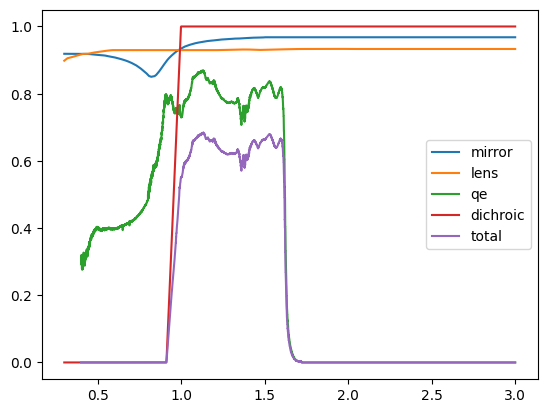

In [13]:
for filename in dichroic_filters:
    dichroic = pd.read_csv(
        filename,
        index_col=0,
        header=None,
        names=["dichroic"],
    )
    # interpolate the dataframes to the same wavelengths
    df = mphot.interpolate_dfs(wavelengths, mirror, lens, qe, dichroic)

    df["total"] = df["mirror"] ** 2 * df["lens"] ** 2 * df["qe"] * df["dichroic"]

    df["total"].dropna().to_csv(
        f"./dichroic_options/speculoos_PIRT_1280SciCam_-60_{filename.split('/')[-1].split('.csv')[0]}.csv",
        header=False,
    )

df.plot()